In [2]:
!pip install pyLDAvis gensim nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Reviews.csv')

# Preprocess function to clean and tokenize text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Apply preprocessing to the 'Text' column
data['tokens'] = data['Text'].apply(preprocess_text)

# Remove rare and common words
dictionary = corpora.Dictionary(data['tokens'])
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create Corpus
corpus = [dictionary.doc2bow(text) for text in data['tokens']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
#Step 2: Determine Optimal Number of Topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


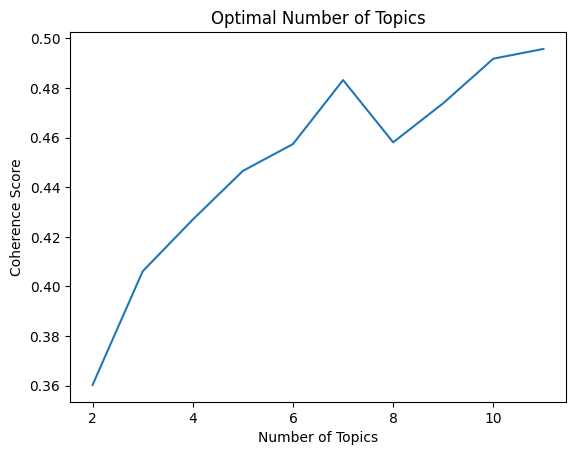

In [5]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Find optimal number of topics
start, limit, step = 2, 12, 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus, data['tokens'], start, limit, step)

# Plot coherence scores to determine the best number of topics
import matplotlib.pyplot as plt

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()


In [6]:
# Train the LDA Model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Choose the optimal number of topics based on coherence score
optimal_num_topics = coherence_values.index(max(coherence_values)) + start

# Train the LDA model with the optimal number of topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics, random_state=42)

# Print the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.241*"br" + 0.011*"sugar" + 0.010*"ingredients" + 0.009*"protein" + 0.008*"fat" + 0.008*"organic" + 0.008*"high" + 0.008*"low" + 0.007*"product" + 0.007*"natural"')
(1, '0.118*"coffee" + 0.029*"cup" + 0.014*"strong" + 0.014*"roast" + 0.014*"flavor" + 0.013*"like" + 0.013*"bold" + 0.013*"dark" + 0.013*"blend" + 0.013*"good"')
(2, '0.025*"chocolate" + 0.017*"great" + 0.016*"good" + 0.016*"like" + 0.016*"chips" + 0.015*"cookies" + 0.015*"love" + 0.015*"taste" + 0.014*"snack" + 0.013*"eat"')
(3, '0.032*"amazon" + 0.027*"price" + 0.019*"product" + 0.018*"great" + 0.017*"find" + 0.016*"store" + 0.015*"buy" + 0.015*"order" + 0.012*"good" + 0.010*"local"')
(4, '0.082*"tea" + 0.024*"water" + 0.022*"drink" + 0.013*"green" + 0.011*"taste" + 0.010*"like" + 0.009*"flavor" + 0.009*"use" + 0.009*"teas" + 0.008*"great"')
(5, '0.016*"free" + 0.014*"baby" + 0.014*"mix" + 0.013*"great" + 0.011*"old" + 0.010*"make" + 0.010*"use" + 0.010*"loves" + 0.010*"son" + 0.010*"gluten"')
(6, '0.046*"like" + 0.

In [8]:
# Visualize Topics Using pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Visualize the topics
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(lda_vis, 'LDA_Topic_Visualization.html')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Model Evaluation
# Evaluation for Sentiment Analysis Models

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


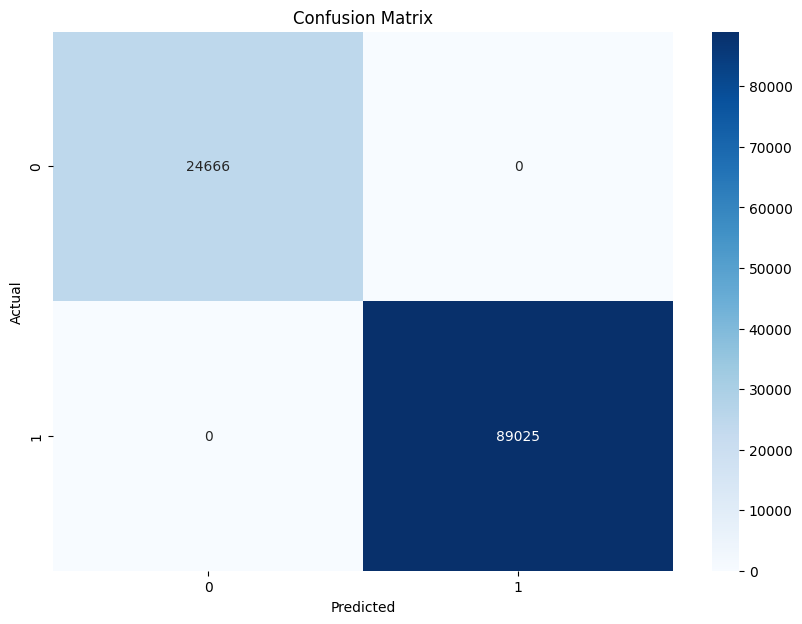

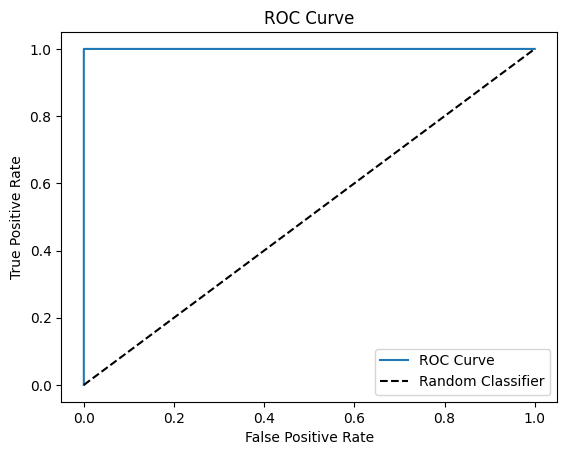

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X = data[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score']]  # Use relevant features
y = np.where(data['Score'] >= 4, 1, 0)  # Simplified sentiment (binary classification example)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model (Logistic Regression as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Function to evaluate model performance
def evaluate_model(y_test, y_pred, y_pred_prob):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

# Evaluate the model
evaluate_model(y_test, y_pred, y_pred_prob)



In [13]:
# Evaluation for Topic Model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Evaluate topic coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['tokens'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f"Topic Coherence Score: {coherence_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic Coherence Score: 0.49577403711200146
